# 1. Introduction to Seaborn

We'll be working with the seaborn visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. 

# 2. Introduction to the Data Set

We'll be working with a data set of the passengers of the Titanic. The [Titanic shipwreck](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

## TODO:
* Read train.csv into a DataFrame named titanic. Keep only the following columns:
  * "Survived"
  * "Pclass"
  * "Sex"
  * "Age"
  * "SibSp"
  * "Parch"
  * "Fare"
  * "Embarked"
* Use the DataFrame.dropna() method to remove rows containing missing values.

In [1]:
import pandas as pd
titanic=pd.read_csv('train.csv')

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic=titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].dropna()

In [4]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# 3. Creating Histograms In Seaborn

 We can generate a histogram using the `seaborn.distplot()` function:

## TODO:
* Import seaborn as sns and matplotlib.pyplot as plt.
* Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
* Display the plot using plt.show().

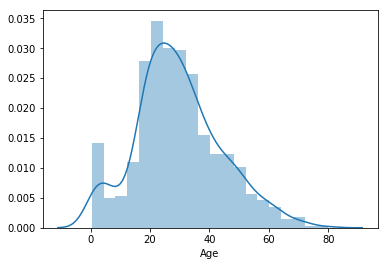

In [5]:
%matplotlib inline

import seaborn as sns
sns.distplot(titanic['Age'])

# 4. Generating A Kernel Density Plot

 To generate just the kernel density plot, we use the seaborn.kdeplot() function:

`sns.kdeplot(titanic["Age"])`

## TODO:
* Generate a kernel density plot:
  * Using the values in the "Age" column
  * With the area under the curve shaded
* Set the x-axis label to "Age" using pyplot.xlabel().

Text(0.5, 0, 'Age')

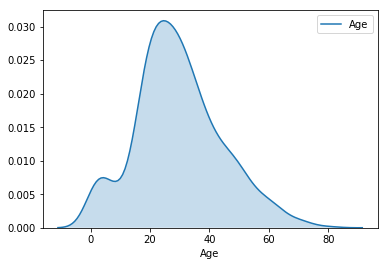

In [6]:
import matplotlib.pyplot as plt

sns.kdeplot(titanic['Age'],shade=True)
plt.xlabel('Age')

# 5. Modifying The Appearance Of The Plots

We can use the **`seaborn.set_style()`** function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

* darkgrid: Coordinate grid displayed, dark background color
* whitegrid: Coordinate grid displayed, white background color
* dark: Coordinate grid hidden, dark background color
* white: Coordinate grid hidden, white background color
* ticks: Coordinate grid hidden, white background color, ticks visible

To remove the axis spines for the top and right axes, we use the **`seaborn.despine()`** function:

To despine the other two axes, `we need to set the left and bottom parameters to True`.

## TODO:
* Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
* Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
* Set the x-axis label to "Age".
* Despine all of the axes.

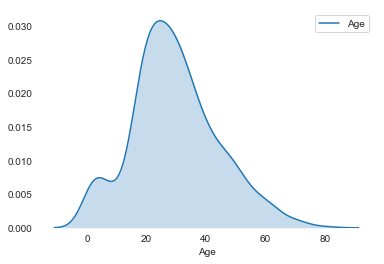

In [7]:
sns.set_style('white')
sns.kdeplot(titanic['Age'],shade=True)
plt.xlabel('Age')
sns.despine(left=True,bottom=True)

# 6. Conditional Distributions Using A Single Condition

In the last few missions, we created a [small multiple](https://en.wikipedia.org/wiki/Small_multiple), which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

The `seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data`. The word "facet" from FacetGrid is another word for "subset"

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of column.

## TODO:
* Use a FacetGrid instance to generate three plots on the same row:
  * One for each unique value of Pclass.
  * Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
  * Each plot should have a height of 6 inches.
* Remove all of the spines using seaborn.despine().
* Display the plots.

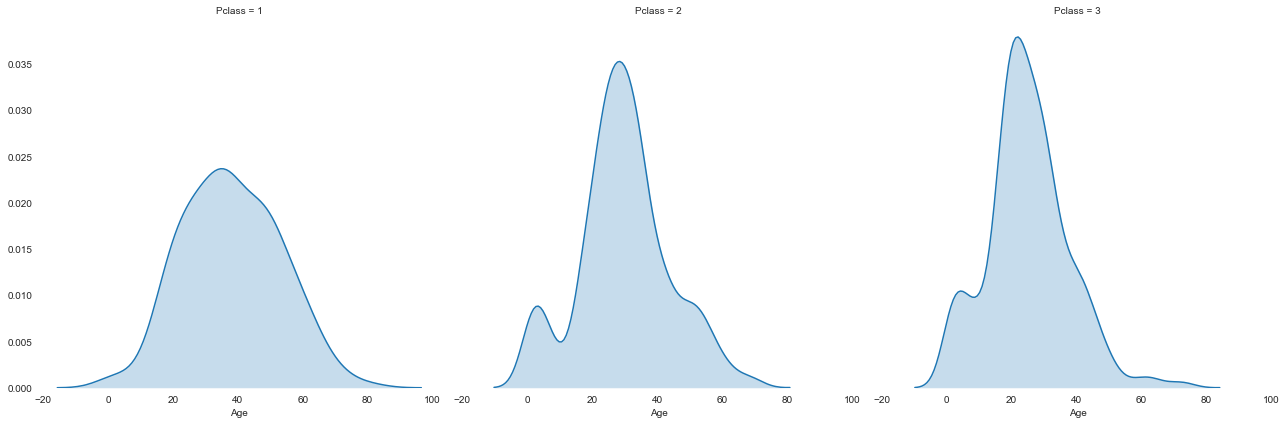

In [8]:
s=sns.FacetGrid(titanic,col='Pclass',height=6)
s.map(sns.kdeplot,'Age',shade=True)
sns.despine(bottom=True,left=True)
plt.show()

# 7. Creating Conditional Plots Using Two Conditions

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid.

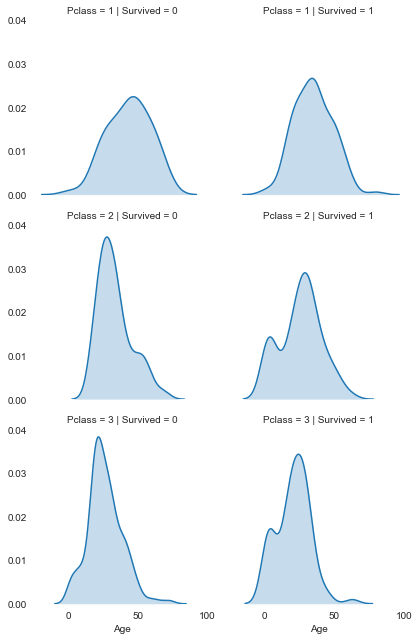

In [9]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

# 8. Creating Conditional Plots Using Three Conditions

When subsetting data using two conditions, the `rows in the grid represented one condition` while the `columns represented another`. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the `hue parameter to the column name` from the dataframe.

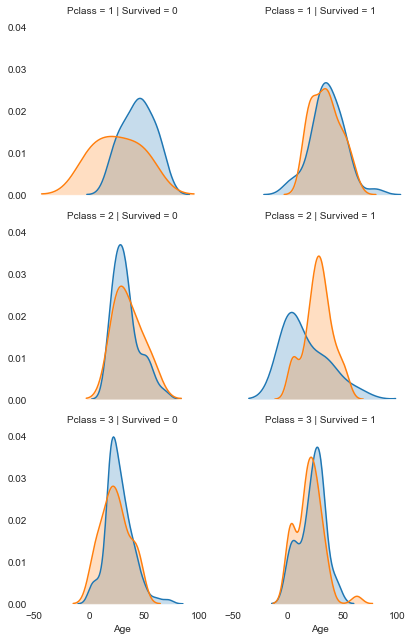

In [10]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass",hue='Sex',height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

# 9. Adding A Legend

## TODO:

* Use a FacetGrid instance to generate a grid of plots using the following conditions:
  * The Survived column across the columns in the grid.
  * The Pclass column across the rows in the grid.
  * The Sex column using different hues.
* Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
* Each plot should have a height of 3 inches.
* Add a legend for the hues representing the values in the Sex column.
  * Make sure that you add your legend before despining.
* Remove all of the spines using seaborn.despine().
* Display the plots.

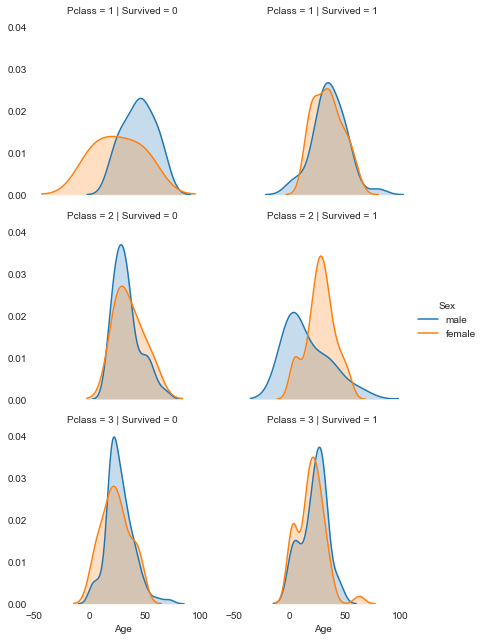

In [11]:
s=sns.FacetGrid(titanic,col='Survived',row='Pclass',hue='Sex',height=3)
s.map(sns.kdeplot,'Age',shade=True)
s.add_legend()
sns.despine(bottom=True,left=True)
plt.show()

In this mission, we learned how the seaborn library lets us quickly style plots and create small multiples using conditions we specify